In [22]:
import numpy as np
import pandas as pd
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)

input
input\evaluation
input\training


In [23]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [24]:
#已解決的ID
solved_id=set()
solved_eva_id=set()

In [25]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

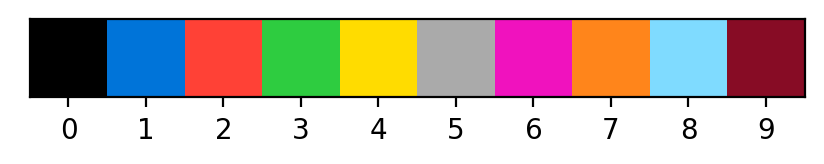

In [26]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [27]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [28]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [29]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

In [30]:
#notice!!!!
def color_delete(a,b):
    c1=np.unique(a)
    c2=np.unique(b)
    #print(c1,c2)
    res=[]
    if len(c2)>len(c1):
        return -1
    for i in range(len(c1)):
        if c1[i] not in c2:
            res.append(c1[i])
#     if len(c2)+len(res)!=len(c1):
#         return -1
    return res

In [31]:
# def color_delete_task(task):
#     Input = task[0]
#     Output = task[1]
#     Test_Picture = Input[-1]
#     Input = Input[:-1]
#     if color_delete(Input[0],Output[0])==-1:
#             return -1
#     del_c=set(color_delete(Input[0],Output[0]))
#     for i in range(1,len(Input)):
#         A=Input[i]
#         B=Output[i]
#         if color_delete(A,B)==-1:
#             return -1
#         else:
#             del_c1=set(color_delete(A,B))
#         del_c=del_c&del_c1
#     return list(del_c)

In [32]:
def color_add_task(task):
    Input = task[0]
    Output = task[1]
    Test_Picture = Input[-1]
    Input = Input[:-1]
    if color_delete(Output[0],Input[0])==-1:
            return -1
    del_c=set(color_delete(Output[0],Input[0]))
    for i in range(1,len(Input)):
        A=Input[i]
        B=Output[i]
        if color_delete(B,A)==-1:
            return -1
        else:
            del_c1=set(color_delete(B,A))
        del_c=del_c&del_c1
    return list(del_c)

In [33]:
def getObjectHash(pixmap):
    flat = pixmap.flatten().astype(np.bool)
    mult = np.array([2 ** x for x in range(len(flat))])
    return np.sum(flat * mult)
#經測試沒有overflow問題
def groupByColor(pixmap):
    nb_colors = int(pixmap.max()) + 1
    splited = [(pixmap == i) * i for i in range(1, nb_colors)]
    return [x for x in splited if np.any(x)]
def checkColorMap(a0,b0):
    a=np.array(a0)
    b=np.array(b0)
    a[a==0]=10
    b[b==0]=10
    c = 1
    inp_hashes = sorted([getObjectHash(pm) for pm in groupByColor(a)])
    out_hashes = sorted([getObjectHash(pm) for pm in groupByColor(b)])
    c *= inp_hashes == out_hashes
    return bool(c)
def findColorMap(a,b):
    colormap = {}
    a1=np.array(a).flatten()
    b1=np.array(b).flatten()

    for col, idx in zip(*np.unique(a1,return_index=True)):
        if col in colormap.keys(): continue
        colormap[col] = b1[idx]
    return colormap

def mergedict(dict1):
    dict3={}
    for dict2 in dict1:
        for key in dict2.keys():
            if key not in dict3.keys():
                dict3[key]=dict2[key]
            elif dict3[key]!= dict2[key]:
                return False
    return dict3
def applyColorMap(pixmap, colormap):
    a1=np.array(pixmap)
    for i in range(a1.shape[0]):
        for j in range(a1.shape[1]):
            if a1[i][j] not in colormap: #
                continue #
            a1[i][j]=colormap[pixmap[i][j]]
    return a1.tolist()

In [34]:
# def get_closed_area(arr0):
#     arr=np.array(arr0)
#     # depth first search
#     H, W = arr.shape
#     Dy = [0, -1, 0, 1]
#     Dx = [1, 0, -1, 0]
#     arr_padded = np.pad(arr, ((1,1),(1,1)), "constant", constant_values=0)
#     searched = np.zeros(arr_padded.shape, dtype=bool)
#     searched[0, 0] = True
#     q = [(0, 0)]
#     while q:
#         y, x = q.pop()
#         for dy, dx in zip(Dy, Dx):
#             y_, x_ = y+dy, x+dx
#             if not 0 <= y_ < H+2 or not 0 <= x_ < W+2:
#                 continue
#             if not searched[y_][x_] and arr_padded[y_][x_]==0:
#                 q.append((y_, x_))
#                 searched[y_, x_] = True
#     res = searched[1:-1, 1:-1]
#     res |= arr!=0
#     return ~res

In [35]:
a=Trains[1]["train"][0]["input"]

In [36]:
def filling(arr0,c):
    arr=np.array(arr0)
    y=Defensive_Copy(arr0)
    def get_closed_area(arr0):
        arr=np.array(arr0)
        # depth first search
        H, W = arr.shape
        Dy = [0, -1, 0, 1]
        Dx = [1, 0, -1, 0]
        arr_padded = np.pad(arr, ((1,1),(1,1)), "constant", constant_values=0)
        searched = np.zeros(arr_padded.shape, dtype=bool)
        searched[0, 0] = True
        q = [(0, 0)]
        while q:
            y, x = q.pop()
            for dy, dx in zip(Dy, Dx):
                y_, x_ = y+dy, x+dx
                if not 0 <= y_ < H+2 or not 0 <= x_ < W+2:
                    continue
                if not searched[y_][x_] and arr_padded[y_][x_]==0:
                    q.append((y_, x_))
                    searched[y_, x_] = True
        res = searched[1:-1, 1:-1]
        res |= arr!=0
        return ~res
    arr[get_closed_area(y)]=c
    return arr.tolist()

In [37]:
def Solve_filling(basic_task): 
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    colormaps={}
    if color_add_task(basic_task)==-1 or len(color_add_task(basic_task))<1:
        return -1
    else:
        c= color_add_task(basic_task)[0]
    for x, y in zip(Input,Output):
        pre_y=filling(x,c)
        if checkColorMap(pre_y,y)==False:
            return -1
        else:
            colormap=findColorMap(pre_y,y)
        if mergedict([colormaps,colormap])==False:
            return -1
        colormaps=mergedict([colormaps,colormap])
        pre_y=applyColorMap(pre_y,colormaps)
        if pre_y != y:
            return -1
            
    res=applyColorMap(filling(Test_Case,c),colormaps)
    return res

In [38]:
basic_task = Create(Trains[186], 0)
color_add_task(basic_task)

[2, 3]

1 0


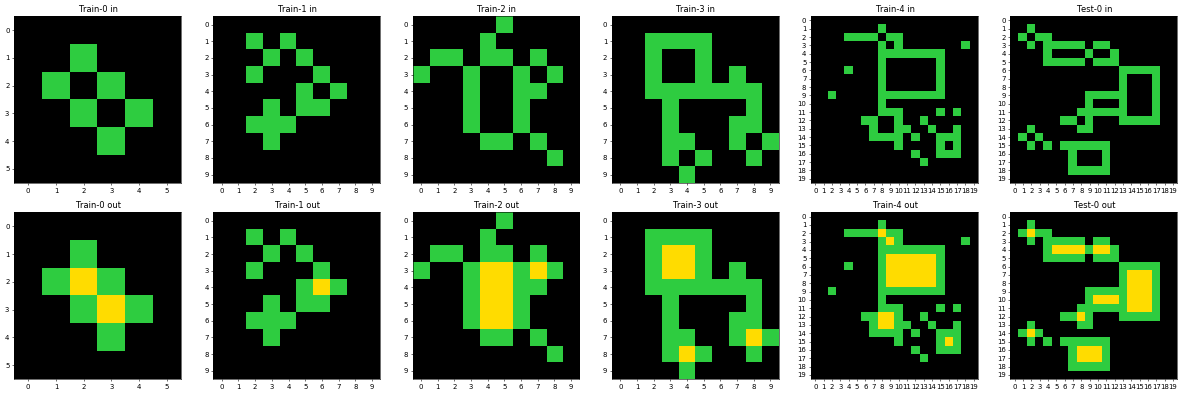

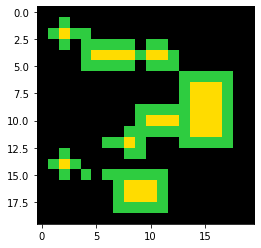

186 0


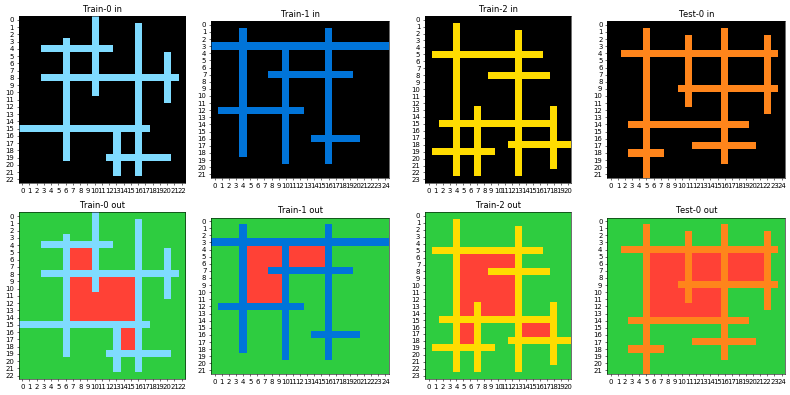

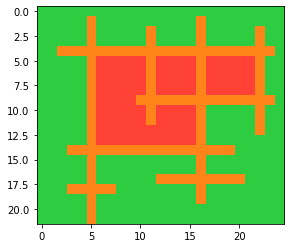

250 0


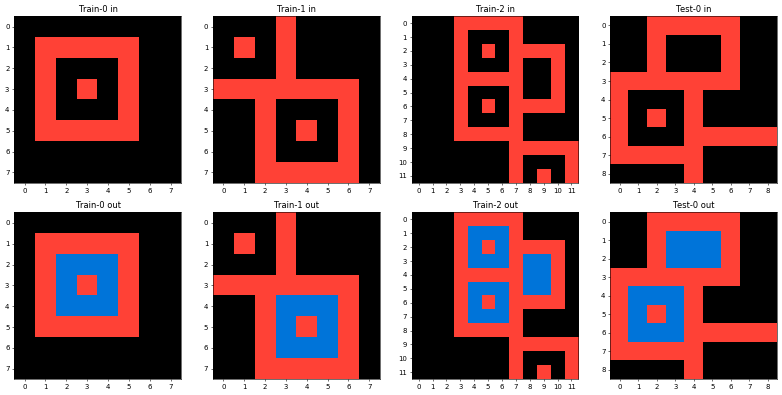

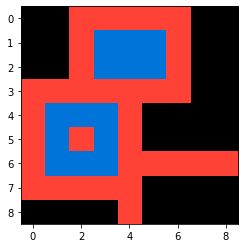

275 0


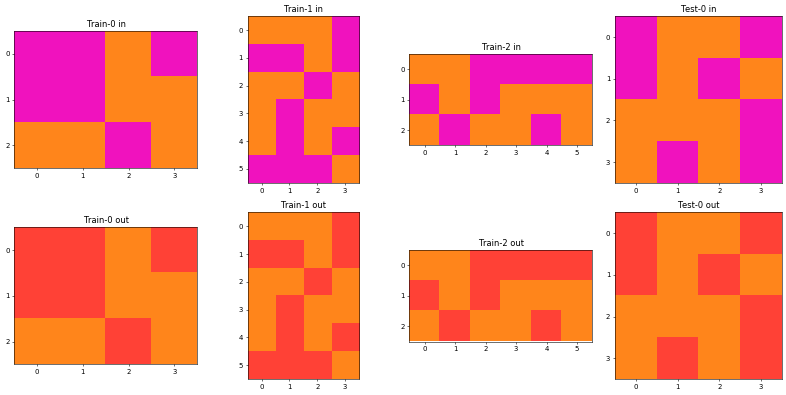

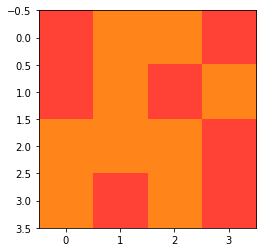

308 0


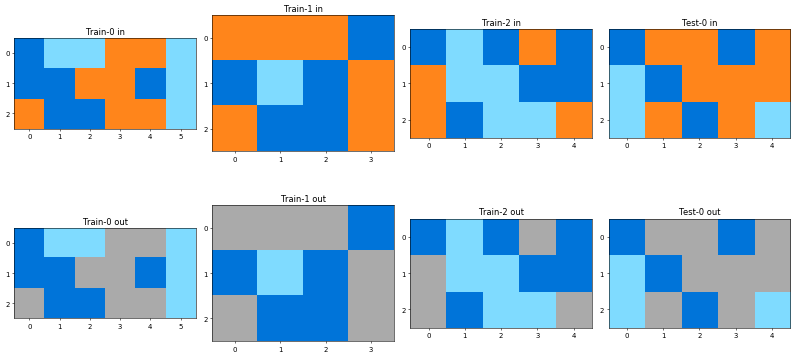

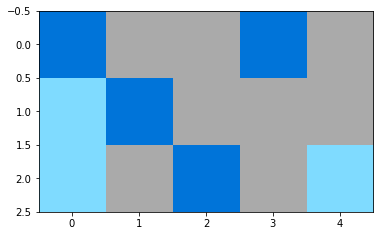

In [39]:
for i in range(400):
    task = Trains[i]
    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        proposed_solution = Solve_filling(basic_task)
        if proposed_solution != -1:
            print(i,j)
            solved_id.add(i)
            plot_task(task)
            
            plot_picture(proposed_solution)

198 0


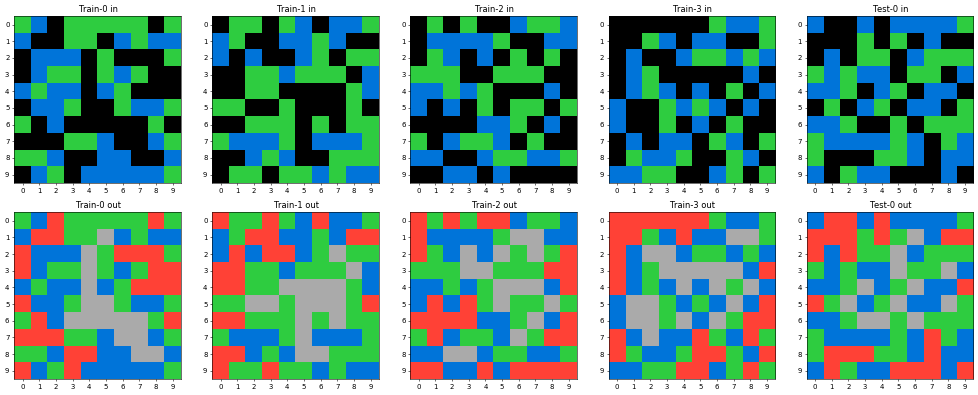

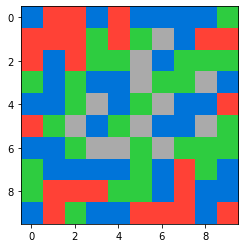

In [40]:
for i in range(400):
    task = Evals[i]
    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        proposed_solution = Solve_filling(basic_task)
        if proposed_solution != -1:
            print(i,j)
            solved_eva_id.add(i)
            plot_task(task)
            
            plot_picture(proposed_solution)

In [41]:
list(solved_id)

[1, 250, 275, 308, 186]

In [42]:
list(solved_eva_id)

[198]